In [4]:
# Import other statistical modules
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [7]:
bp_reading=pd.read_csv('Data-sets/blood_pressure.csv')

In [8]:
bp_reading.sample(10)

,patient,sex,agegrp,bp_before,bp_after
7,8,Male,30-45,153,141
61,62,Female,30-45,147,142
34,35,Male,46-59,170,151
33,34,Male,46-59,148,184
24,25,Male,46-59,164,160
110,111,Female,60+,183,161
102,103,Female,60+,147,149
96,97,Female,46-59,144,169
74,75,Female,30-45,147,147
4,5,Male,30-45,146,141


In [13]:
%matplotlib inline

In [19]:
#bp_reading.boxplot(column='bp_before')
#bp_reading.boxplot(column='bp_after')

In [22]:
# Describe and Transpose
bp_reading.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


In [23]:
bp_reading.shape

(120, 5)

# <span style='çolor:blue'>Whether data bp before and after the interjection is significant</span>
- Explore date visually
- test significance of variance - run LEVENE's test
- 

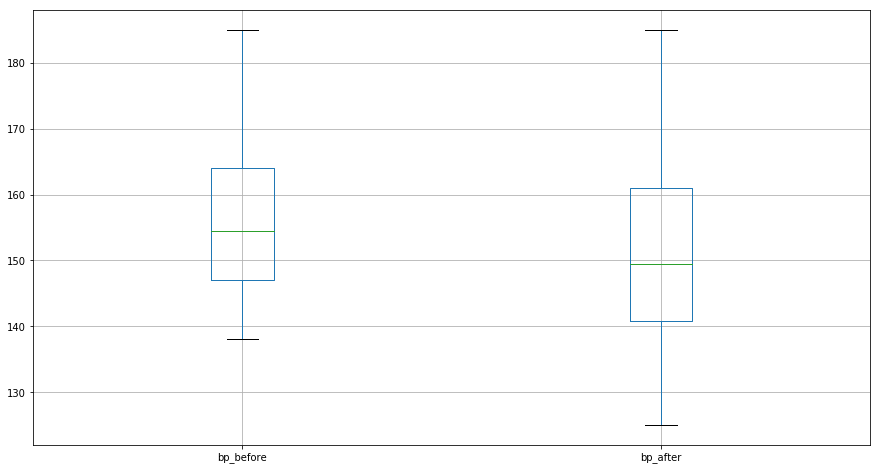

In [30]:
bp_reading[['bp_before','bp_after']].boxplot(figsize=(15,8))

In [31]:
stats.levene(bp_reading.bp_before,bp_reading.bp_after)

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

# P Value says variance is significance, so we can't perform independent T Test , we have to carry out difference test to find out difference of means is SIGNIFICANT or not

In [32]:
bp_reading['bp_diff']=bp_reading.bp_before-bp_reading.bp_after

In [33]:
bp_reading.head()

,patient,sex,agegrp,bp_before,bp_after,bp_diff
0,1,Male,30-45,143,153,-10
1,2,Male,30-45,163,170,-7
2,3,Male,30-45,153,168,-15
3,4,Male,30-45,153,142,11
4,5,Male,30-45,146,141,5


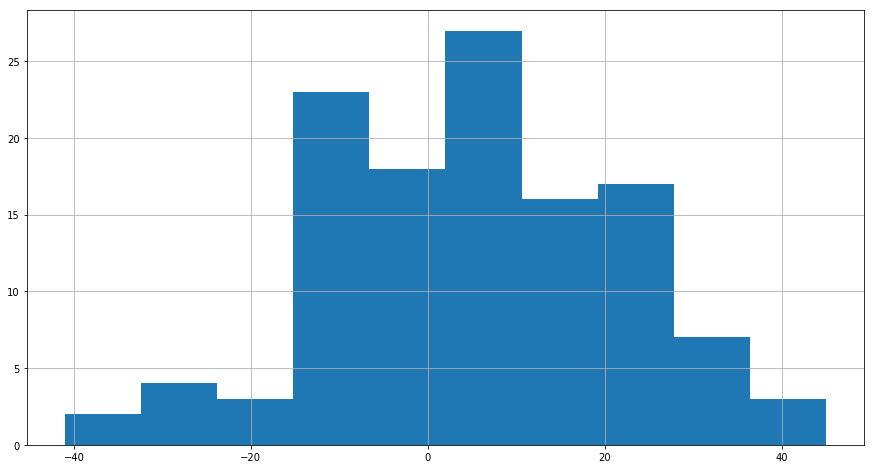

In [36]:
# Check for normality of the difference
bp_reading.bp_diff.hist(figsize=(15,8))

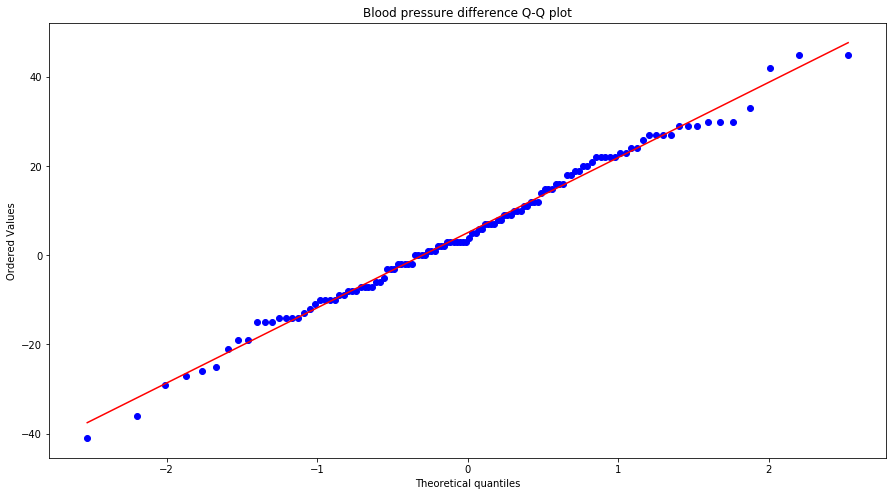

In [46]:
# Lets confirm the normal distribution visually by running probplot 
plt.figure(figsize=(15,8))
stats.probplot(bp_reading.bp_diff,plot=plt)
plt.title('Blood pressure difference Q-Q plot')
plt.show()

In [48]:
# Confirm the 2nd Assumption by running SHAPIRO that RESIDUALS are NORMALLY DISTRIBUTED
stats.shapiro(bp_reading.bp_diff)

(0.9926842451095581, 0.7841846942901611)

# If want to perform IND T Test on paired value 

In [49]:
stats.ttest_rel(bp_reading.bp_after,bp_reading.bp_before)

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

# But LEVENEs test indicated that variance are significantly difference so we can't rely on independent T Test , this case TTEST.REL
# We can perform WELCH's test 

In [52]:
rp.ttest(bp_reading.bp_after,bp_reading.bp_before,paired=True,equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for bp_after =,151.358333
1,Mean for bp_before =,156.450000
2,W value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


# <span style='color:red'>Conclusion: Blood pressure reading after interjection was significant</span>